In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("./data/iris.csv")
print(df)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
##Update the dataframe; assign the classification a value of 1 or 0 where 1 = "Iris Veriscolour".
iris_type = {'Iris-virginica': 0, 'Iris-setosa': 0, 'Iris-versicolor': 1}
df['class'] = df['class'].replace(iris_type)
df

C:\Users\kasey\AppData\Local\Temp\ipykernel_9472\2788827901.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(iris_type)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [4]:
print(df["class"].unique())

[0 1]


In [5]:
feature_count = df.shape[1] - 1
rows_list = []
for i in range(len(df)):
    new_row = np.array(df.iloc[i,0:feature_count])
    rows_list.append(new_row)
    
x = np.array(rows_list)
y = np.array(df.iloc[:,feature_count])
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [6]:
n = len(y)
randy = np.random.default_rng()
idx = np.arange(n)
randy.shuffle(idx)

## Splits the data into 80% training and 20% validation
train_idx = idx[:int(n*.8)]
val_idx = idx[int(n*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

training_lenth = len(x_train)
validation_length = len(x_val)
print(f"The training data has {training_lenth} observations.")
print(f"The validation data has {validation_length} observations.")

The training data has 120 observations.
The validation data has 30 observations.


In [7]:
sns.set_theme(palette="flare")
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

## Visualize the Training Data

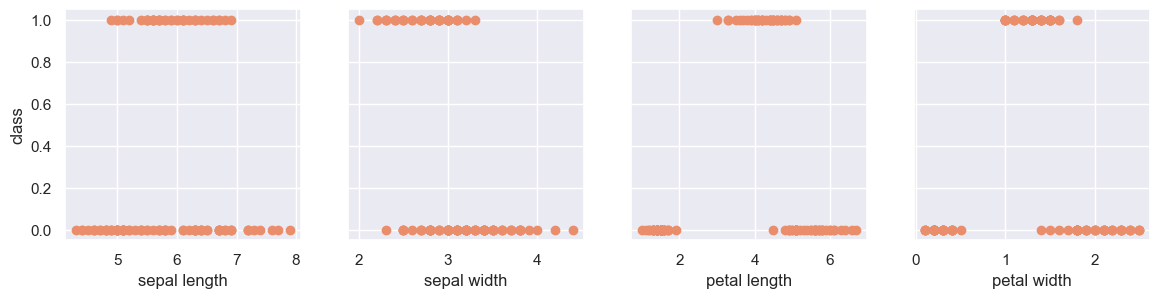

In [8]:
## plot the data from the first four features in side by side graphs
columns = df.columns.tolist()
x_features = columns[:feature_count]
y_feature = columns[feature_count]

fig, ax=plt.subplots(1,4,  figsize=(14,3),  sharey=True)

for i in range(4):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel(y_feature)
plt.show()

In [53]:
print(columns)

['sepal length', 'sepal width', 'petal length', 'petal width', 'class']


In [9]:
## plots logistic data using the first two features as the x y axis
def plot_data(X, y, ax, pos_label, neg_label, s=80, loc='best' ):

    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)
    neg = neg.reshape(-1,)

    ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=s, label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=s, label=neg_label, lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

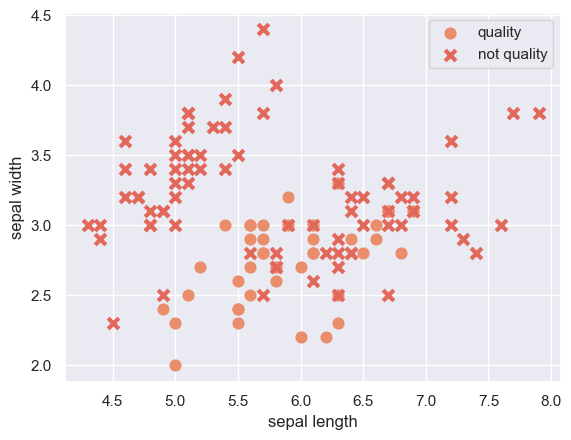

In [10]:
fig, ax = plt.subplots()
plot_data(x_train[0:200], y_train[0:200], ax, "quality", "not quality", s=60)
x_label,y_label = x_features[0:2]
##y_label = y_feature
plt.ylabel(y_label) 
plt.xlabel(x_label) 
plt.legend(loc="upper right")
plt.show()

## Create a Neural Net Model

In [11]:
## Scale Data
abby = tf.keras.layers.Normalization()
abby.adapt(x_train)
x_train_norm = abby(x_train)

In [12]:
## Create Model
#pick number of layers, number of neurons, ReLu activation, desnse layers

Model = Sequential([
    Dense(units=4, activation='relu'),
    Dense(units=2, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [39]:
# Compile the model
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = Model.fit(x_train_norm, y_train, epochs=50, batch_size=256, validation_split=0.2)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step - accuracy: 0.7917 - loss: 0.5937 - val_accuracy: 0.7917 - val_loss: 0.6168
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7917 - loss: 0.5931 - val_accuracy: 0.7917 - val_loss: 0.6162
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7917 - loss: 0.5926 - val_accuracy: 0.7917 - val_loss: 0.6155
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7917 - loss: 0.5920 - val_accuracy: 0.7917 - val_loss: 0.6148
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7917 - loss: 0.5914 - val_accuracy: 0.7917 - val_loss: 0.6141
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7917 - loss: 0.5909 - val_accuracy: 0.7917 - val_loss: 0.6134
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7917 - loss: 0.5904 - val_accuracy: 0.7917 - val_loss: 0.6128
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7917 - loss: 0.5899 - val_accuracy: 0.7917 - val_loss: 0.6121

In [40]:
x_val_norm = abby(x_val)
y_prediction = Model.predict(x_val_norm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [41]:
print(y_prediction[0:20])

[[0.4265359 ]
 [0.4265359 ]
 [0.4265359 ]
 [0.4265359 ]
 [0.4265359 ]
 [0.5101799 ]
 [0.4265359 ]
 [0.4265359 ]
 [0.4265359 ]
 [0.43965656]
 [0.4265359 ]
 [0.4265359 ]
 [0.4265359 ]
 [0.4265359 ]
 [0.4265359 ]
 [0.4265359 ]
 [0.43227217]
 [0.4265359 ]
 [0.7866649 ]
 [0.7402863 ]]


In [42]:
y_prediction = (y_prediction >= 0.5).astype(int)

## Look at the Results

In [43]:
print(y_val.shape)
print(y_prediction.shape)

(30,)
(30, 1)


In [44]:
y_prediction = y_prediction.reshape(-1)
fig_newton = np.array([y_val,y_prediction])

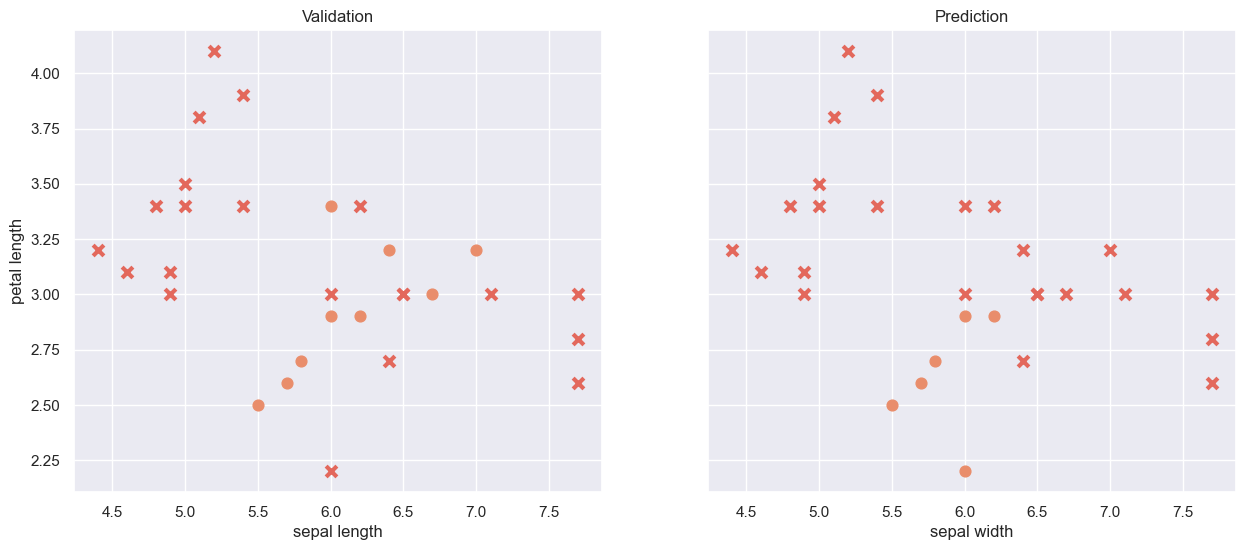

In [54]:
x_titles = ['Validation', 'Prediction']

fig, ax=plt.subplots(1,2,  figsize=(15,6),  sharey=True)

for i in range(2):
    y=fig_newton[i,0:200]
    x=x_val[0:200]

    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)
    neg = neg.reshape(-1,)
    #ax.legend(loc=loc)

    ax[i].scatter(x[pos, 0], x[pos, 1], marker='o', s=60, label='pos_label')
    ax[i].scatter(x[neg, 0], x[neg, 1], marker='x', s=60, label='neg_label', lw=3)
    ax[i].set_xlabel(x_features[i])
    ax[i].set_title(x_titles[i])
ax[0].set_ylabel(x_features[i+1])
plt.show()

## Confusion Matrix

In [46]:
cm = confusion_matrix(y_val, y_prediction)

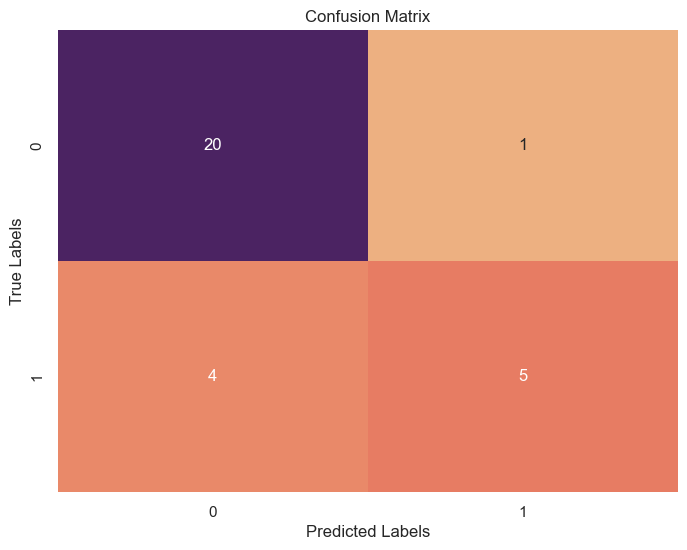

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Calculate the F1 score

In [48]:
from sklearn.metrics import classification_report
class_labels = ["Other Iris", "Iris Versicolour"]

In [49]:
print(classification_report(y_val, y_prediction, target_names=class_labels, zero_division=0))

                  precision    recall  f1-score   support

      Other Iris       0.83      0.95      0.89        21
Iris Versicolour       0.83      0.56      0.67         9

        accuracy                           0.83        30
       macro avg       0.83      0.75      0.78        30
    weighted avg       0.83      0.83      0.82        30



## Calculate the accuracy

In [50]:
matches = y_val == y_prediction  # This returns a boolean array

# Calculate the percentage of matches
percentage_match = np.sum(matches) / len(y_val) * 100

print(f"Percentage of matching elements: {percentage_match}%")

Percentage of matching elements: 83.33333333333334%


## Conclusions

While this data is better suited for a multiclass classifcation model, it also works really well as a binary classification model where 1 represents a certain type of iris and 0 represents the absence of that type of iris. 